# Load required packages first

In [ ]:
library(resampledata)  # to access Bangladesh and NCBirths2004
library(tidyverse)  # to use read_csv 

## Revisiting Question 11: Arsenic Case Study

------------------------------------------------------------------------

Arsenic is a naturally occurring element in the groundwater in
Bangladesh. Much of this water is used for drinking in rural areas, so
arsenic poisoning is a serious health issue. The dataset `Bangladesh` in
the `resampledata` package contains measurements on arsenic, chlorine,
and cobalt levels (in parts per billion, ppb) present in each of 271
groundwater samples.

In [ ]:
#library(resampledata)  # this has already been loaded
?Bangladesh

### Question 11a:

------------------------------------------------------------------------

Complete the code cell below to calculate the mean and standard
deviation and size of the arsenic level of the sample.

In [ ]:
# Load and summarize the sample
arsenic <- Bangladesh$Arsenic
mean.arsenic <-mean(arsenic)
sd.arsenic <- sd(arsenic)
n.arsenic <- length(arsenic) # how many observations in arsenic
mean.arsenic
sd.arsenic
n.arsenic

#### Solution to Question 11a:

------------------------------------------------------------------------

Complete the code cell above.

  
  

### Question 11b:

------------------------------------------------------------------------

Create a histogram to show the shape of the distribution of the sample
data. How would you describe the shape?

In [ ]:
par(mfrow=c(1,2))
hist(arsenic)

# Optional code below creates a cool thing we have yet to encounter.
# We'll see how to interpret this plot shortly.
qqnorm(arsenic)
qqline(arsenic)

In [ ]:
par(mfrow=c(1,1))

#### Solution to Question 11b:

------------------------------------------------------------------------

The distribution is heavily skewed to the right. Most of the samples
have a very small arsenic level. However, there are a few samples that
have extremely high levels of arsenic.

  

### Question 11c:

------------------------------------------------------------------------

Complete the code cell below to generate a bootstrap distribution for
the sample mean. What are the center and spread (standard error) of the
bootstrap distribution?

In [ ]:
set.seed(917) # so I get consistent results for solutions

par(mfrow=c(1,2))

N <- 10^5 # Number of bootstrap samples
boot.dist <- numeric(N) #create vector to store bootstrap means

# Set up a for loop!

for (i in 1:N)
{
  x <- sample(arsenic, 271, replace = TRUE)
  boot.dist[i] <- mean(x)
}

boot.ar.mean <- mean(boot.dist) #Calculate center of bootstrap dist
boot.ar.se <- sd(boot.dist) #Calculate bootstrap standard error

# Show bootstrap distribution
hist(boot.dist,  xlab = "xbar",
     main = "Bootstrap Distribution")

# Add a red line at the observed sample mean
abline(v = mean.arsenic, col = "red", lwd = 2, lty = 2)

# Add a blue line at the center of bootstrap dist s
abline(v = boot.ar.mean, col = "blue", lwd = 2, lty = 1)

# Compare bootstrap dist to normal dist
# Again, we'll get to these.
qqnorm(boot.dist)
qqline(boot.dist)

In [ ]:
par(mfrow=c(1,1))

In [ ]:
# Prints mean and standard error to screen
boot.ar.mean
boot.ar.se

#### Solution to Question 11c:

------------------------------------------------------------------------

Complete the code cell above.

  

The bootstrap distribution is approximately normally distributed. The
mean of the bootstrap distribution is 125.29 ppb, and the bootstrap
standard error is 18.05 ppb.

# Estimating Parameters with Bootstrap Distributions

------------------------------------------------------------------------

If we want to estimate the mean arsenic level of all groundwater in
Bangladesh, then, based on our analysis above, a reasonable estimate is
to use mean of the bootstrap distribution:

$$ \mu_{\rm arsenic} \approx \mu_{\rm boot} = 125.2862 \mbox{ ppb}$$

Usually when estimating an unknown population parameter, we give an
<span style="color: blue;">**interval estimate**</span> that gives range
of plausible values for the parameter by accounting for the uncertainty
due to the variability in sampling.

-   For example, using both mean and standard error from the bootstrap
    distribution, we could say

$$ \mu_{\rm arsenic} \approx \mu_{\rm boot} \color{blue}{\pm \mbox{SE}_{\rm boot} \left( \overline{X} \right)} = 125.2862 \color{blue}{\pm 18.05} \mbox{ ppb}$$

## Interval and Point Estimates

------------------------------------------------------------------------

-   An estimate for a parameter with a single value is called a <span
    style="color: blue;">**point estimate**</span>.

    -   Since there is variability from sample to sample due to
        randomness, it is not very likely that our point estimate is
        accurate, but it is likely close.
    -   We get a very specific estimate that is very unlikely to be
        correct.
    -   This is like trying to catch a fish with a spear.

-   An estimate for a parameter with a range of values is called an
    <span style="color: blue;">**interval estimate**</span>.

    -   By building some uncertainty into our estimate, we can be more
        confident the actual value of the parameter is somewhere inside
        the interval.
    -   However, our estimate is less specific.
    -   This is like trying to catch a fish with a net. We are more
        likely to catch fish!

-   We frequently estimate parameters with interval to account for the
    variability of sample statistics.

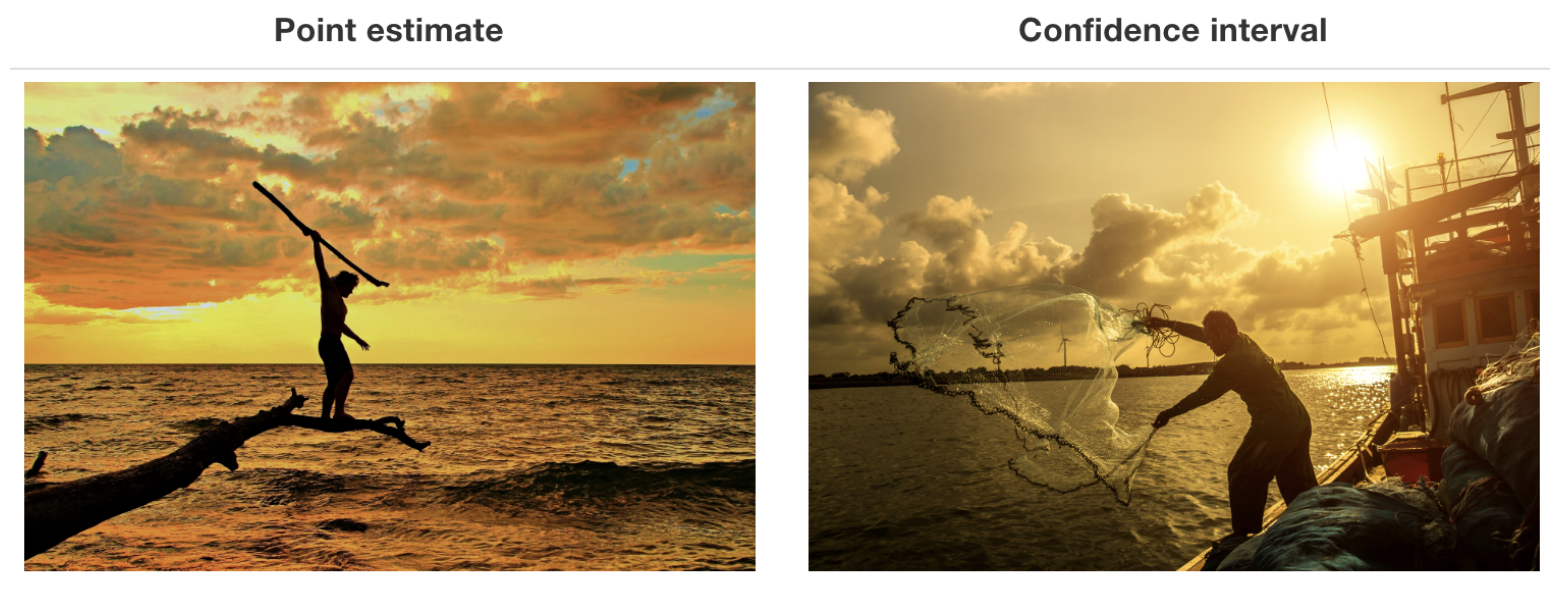

## A 95% Bootstrap Percentile Confidence Interval

------------------------------------------------------------------------

The interval between the $2.5$ and $97.5$ percentiles of the bootstrap
distribution of a statistic is a <span syle="color: blue;">**95%
bootstrap percentile confidence interval**</span> for the corresponding
parameter.

-   If most of the sample statistics are located in a certain interval
    of the bootstrap distribution, it seems plausible the true value of
    the parameter is in this interval!
-   We would say we are 95% confident that the interval contains the
    actual value of the population parameter since 95% of the bootstrap
    resamples are inside this interval.
-   In general, **confidence interval estimates give a range of
    plausible values for the unknown value of the parameter.**

## Question 1: Interval Estimates for Mean Arsenic Level

------------------------------------------------------------------------

We return the bootstrap distribution we created to approximate the
sampling distribution for the mean arsenic level of groundwater in
Bangladesh.

### Question 1a

------------------------------------------------------------------------

Compute a 95% bootstrap percentile confidence interval for the mean
arsenic level in groundwater in Bangladesh.

#### Solution to Question 1a

------------------------------------------------------------------------

Replace each `??` with appropriate code.

In [ ]:
# Find cutoffs for 95% bootstrap CI
lower <- quantile(boot.dist, probs = 0.025)
upper <- quantile(boot.dist, probs = 0.975)
lower
upper

### Question 1b

------------------------------------------------------------------------

The code cell below plots a bootstrap distribution that approximates the
sampling distribution for mean arsenic level in all groundwater in
Bangladesh. Run the code, and then in the space below, interpret the
**practical meaning** of the interval estimate. For example, explain
what the interval means to a person with little or no statistical
background.

In [ ]:
hist(boot.dist,  xlab = "xbar (ppb)",
     xlim = c(50,200),
     main = "Bootstrap Dist for Mean Arsenic Level (n=271)")

# Add a red line at the mean of the bootstrap dist
abline(v = boot.ar.mean, col = "red", lwd = 2, lty = 2)

# Add blue lines at the 2.5 and 97.5 percentiles
abline(v = lower, col = "blue", lwd = 2, lty = 2)
abline(v = upper, col = "blue", lwd = 2, lty = 2)

#### Solution to Question 1b

------------------------------------------------------------------------

This interval is giving a range of plausible values for the mean arsenic
level of all groundwater in Bangladesh.

There is a 95% chance the interval from 92.54 ppb to 163.08 ppb contains
the actual mean arsenic level of all groundwater in Bangladesh.

### Question 1c

------------------------------------------------------------------------

**Sometimes it is nice to describe the interval as some value plus or
minus some margin of error**. Construct a symmetric 95% bootstrap
confidence interval for the mean arsenic level.

-   Recall with normal distributions, approximately 95% of the data is
    within 2 standard deviations of center of the distribution.

#### Solution to Question 1c

------------------------------------------------------------------------

Replace each `??` in the code cell below with appropriate code.

In [ ]:
mean.arsenic - 2*boot.ar.se  #going 2 SE's below the point est
mean.arsenic + 2*boot.ar.se  #going 2 SE's above the point est

There is a 95% chance the interval $125.32 \pm 36.1$ ppb contains the
actual mean arsenic level of all groundwater in Bangladesh.

## Question 2: North Carolina Newborns

------------------------------------------------------------------------

We return to the dataset `NCBirths2004` from the `resampledata` package.
Previously, we constructed a bootstrap distribution for the mean weights
of newborns in North Carolina in 2004. In this question, we’ll construct
an interval estimate for a proportion to answer the question below.

> What proportion of pregnant people smoked while pregnant in North
> Carolina in 2004?

We summarize the dataset below, and to answer this question, we will use
the variable `Smoker`.

In [ ]:
options(width = 80)  # sets width of output so summary displays
summary(NCBirths2004)

### Question 2a: Calculating the Sample Proportion

------------------------------------------------------------------------

-   We denote $p$ the proportion of all pregnant people smoked while
    pregnant in North Carolina in 2004. This parameter is unknown.
-   A reasonable point estimate would be to use the sample proportion
    $\hat{p}$.

  

**How is the code cell below answering this question? Interpret the code
cell below, and then interpret the meaning of the output.**

In [ ]:
#library(resampledata)  # this package was loaded earlier

smoker <- NCBirths2004$Smoker  # saves smoking sample data to vector
total.smoke <- sum(smoker == "Yes")  # count how many smokers are in sample
total.smoke
total.preg <- length(smoker)  # total number of observations in sample
total.preg
samp.prop <- total.smoke / total.preg  # compute p-hat, sample proportion
samp.prop

#### Solution to Question 2a

------------------------------------------------------------------------

In the sample of 1009 pregnant people, 111 said they smoked, giving
$\hat{p} = 0.11$.

### Question 2b: Calculating the Sample Proportion Method 2

------------------------------------------------------------------------

In the previous code, we computed the sample proportion of smokers using
the `sum` command that we converted to a proportion. Below we compute
proportion in one line of code.

  

**Interpret the code cell below. Why is the output the same as the
previous code cell?**

In [ ]:
#library(resampledata)  # this package was loaded earlier

samp.prop2 <- mean(smoker == "Yes")  
samp.prop2

#### Solution to Question 2b

------------------------------------------------------------------------

The logical test `smoker == "Yes"` converts the vector `smoker` that
contains strings “Yes” and “No”’s to a vector of 0’s and 1’s.

-   Each “Yes” is assigned the value 1.
-   Each “No” is assigned the value 0.
-   Then we take the mean of the vector of 0’s and 1’s.

$$\mbox{mean(smoker == "Yes")} = \frac{\mbox{number of 1's}}{\mbox{size of sample}} = \hat{p}$$

### Question 2c: Bootstrapping a Proportion

------------------------------------------------------------------------

Complete the code below to create a bootstrap distribution for the
sample proportion of smokers.

#### Solution to Question 2c

------------------------------------------------------------------------

# Remove Seed

In [ ]:
set.seed(917)

N <- 10^4 # Number of bootstrap samples
boot.prop <- numeric(N) #create vector to store bootstrap means

for (i in 1:N)
{
  y <- sample(smoker, length(smoker), replace = TRUE)
  boot.prop[i] <- mean(y == "Yes")
}


hist(boot.prop,  xlab = "p-hat",
          xlim = c(0.06, 0.16),
          main = "Bootstrap Dist for Proportion of Smokers (n=1009)")

# Add a red line at the observed sample mean
abline(v = samp.prop, col = "red", lwd = 2, lty = 2)

### Question 2d

------------------------------------------------------------------------

Complete the code cell to give a 95% bootstrap confidence interval to
estimate the mean weight of all babies born in North Carolina in 2004.
Then plot a histogram of the bootstrap distribution from \[Question 2c\]
with the upper and lower confidence interval cutoffs marked with
vertical lines. Replace each `??` with appropriate code.

#### Solution to Question 2d

------------------------------------------------------------------------

In [ ]:
# Find cutoffs for 95% bootstrap CI
lower.cl95 <- quantile(boot.prop, probs = 0.025)
upper.cl95 <- quantile(boot.prop, probs = 0.975)
lower.cl95
upper.cl95

hist(boot.prop,  xlab = "p-hat",
          xlim = c(0.06, 0.16),
          main = "Bootstrap Dist for Proportion of Smokers (n=1009)")

# Add a red line at the observed sample mean
abline(v = samp.prop, col = "red", lwd = 2, lty = 2)

# Add blue lines at cutoffs for 95 percentile
abline(v = lower.cl95, col = "blue", lwd = 2, lty = 2)
abline(v = upper.cl95, col = "blue", lwd = 2, lty = 2)

### Question 2e

------------------------------------------------------------------------

Complete the code cell to give a 90% bootstrap confidence interval to
estimate the mean weight of all babies born in North Carolina in 2004.
Then plot a histogram of the bootstrap distribution from \[Question 2c\]
with the upper and lower confidence interval cutoffs marked with
vertical lines. Replace each `??` with appropriate code.

#### Solution to Question 2e

------------------------------------------------------------------------

In [ ]:
# Find cutoffs for 90% bootstrap CI
lower.cl90 <- quantile(boot.prop, probs = 0.05)
upper.cl90 <- quantile(boot.prop, probs = 0.95)
lower.cl90
upper.cl90

hist(boot.prop,  xlab = "p-hat",
          xlim = c(0.06, 0.16),
          main = "Bootstrap Dist for Proportion of Smokers (n=1009)")

# Add a red line at the observed sample mean
abline(v = samp.prop, col = "red", lwd = 2, lty = 2)

# Add blue lines at cutoffs for 95 percentile
abline(v = lower.cl90, col = "blue", lwd = 2, lty = 2)
abline(v = upper.cl90, col = "blue", lwd = 2, lty = 2)

### Question 2f

------------------------------------------------------------------------

Interpret the practical meaning of your 90% bootstrap percentile
confidence interval from [Question 2e](#question-2e).

#### Solution to Question 2f

------------------------------------------------------------------------

There is a 90% chance the interval from 9.42% to 12.59% contains the
percentage of all pregnant people in North Carolina in 2004 that smoked.

### Question 2g

------------------------------------------------------------------------

When we decreased the confidence level, what happened to the confidence
interval estimate?

#### Solution to Question 2g

------------------------------------------------------------------------

The confidence gets more narrow. This makes since the more narrow our
interval gets (smaller net), the odds of containing the actual value of
the population parameter (catching a fish), goes down. **Thus, as we
lower the confidence level, the corresponding interval estimate becomes
more narrow.**

# Bootstrapping Two Independent Samples

------------------------------------------------------------------------

Often in a study, we may be interested in determining whether there is
an association between different variables. For example, we can ask:

> Does smoking during gestation have an affect on the weight of the baby
> at birth? For the population of all newborns in North Carolina in
> 2004, estimate the difference in mean birth weights between newborn
> babies of smokers compared to the weights of newborn babies of
> non-smokers.

## Process for Bootstrapping Two Independent Samples

------------------------------------------------------------------------

Given independent samples of sizes $m$ and $n$ from two populations:

-   Draw a resample of size $m$ with replacement from the first sample.
-   Draw a resample of size $n$ with replacement from the second sample.
-   Compute a statistic that compares the two groups such as a
    difference or ration of two statistics (means, proportions, etc.)
    -   Note for a difference in two means or two proportions, we can
        use CLT.
    -   For a ratio of two statistics, or if compare different
        statistics (other than means or proportions), there is no CLT.
        **We can still create a bootstrap distribution even if the CLT
        does not apply.**
-   Repeat resampling many times over.
-   Construct a bootstrap distribution of the comparison statistic (such
    as a difference of means).

## Question 3: Bootstrapping a Difference

------------------------------------------------------------------------

What is the difference between the birth weights of babies of smokers
compared to birth weights of babies from non-smokers?

### Question 3a

------------------------------------------------------------------------

Create a side-by-side boxplots to compare the distribution of weights
for smokers and non-smokers. Based on the output, make at least one
comparative statement about the weights between the two groups.

#### Solution to Question 3a

------------------------------------------------------------------------

Replace each `??` in the code cell below to generate side-by-side
boxplots for comparison.

In [ ]:
plot(Weight ~ Smoker, data = NCBirths2004, 
     col = "springgreen4",
     main = "Comparison of Birth Weights from Smokers and Non-Smokers",
     xlab = "Smoking Status of Pregnant Parent",
     names = c("Non-smoker", "Smoker"))

**Write your comparative statement(s) below. I wrote one as an
example.**

For the non-smokers, only about 25% of all newborns weighed less than
3250 grams. For the smokers, about 50% of all newborns weighed less than
3250 grams.

### Question 3b

------------------------------------------------------------------------

Compute the difference between the mean birth weight for the smokers?
and non-smokers. How many newborns in the sample are in each group?

#### Solution to Question 3b

------------------------------------------------------------------------

Complete the code cell below by replacing each `??` with appropriate
code.

In [ ]:
# vector of all newborn weights in sample
all.wt <- NCBirths2004$Weight

# vector of smoker weights
smoker.wt <- subset(NCBirths2004, select = Weight,
                   Smoker == "Yes", drop = T)

# vector of non-smoker weights
non.wt <- subset(NCBirths2004, select = Weight,
                   Smoker == "No", drop = T)


# Computing means and sample sizes
n.smoker <- length(smoker.wt)
n.non <- length(non.wt)
mean.smoker <- mean(smoker.wt)
mean.non <- mean(non.wt)

# Compute the difference in two sample means
obs.diff <- mean.smoker - mean.non

# Print some output to screen
n.smoker
n.non
mean.smoker
mean.non
obs.diff

-   There are 111 pregnant parents that said they smoked while 898 said
    they did not.
-   The mean birth weight for the smoker sample is 3256.91 grams.
-   The mean birth weight for the non-smoker sample is 3471.912 grams.
-   The difference (smoker - non) is therefore -215 grams.
-   Is this difference big? Or is this difference due to the randomness
    in sampling?

### Question 3c

------------------------------------------------------------------------

Generate one possible bootstrap resample (from each sample).

#### Solution to Question 3c

------------------------------------------------------------------------

Complete the code cell below by replacing each `??` with appropriate
code.

In [ ]:
smoker.resample <-sample(smoker.wt, n.smoker, replace = TRUE)  # resample for smokers
non.resample <- sample(non.wt, n.non, replace = TRUE)  # resample for non-smokers

# Print first 6 values in each resample
head(smoker.resample)
head(non.resample)

### Question 3d

------------------------------------------------------------------------

Give a 99% bootstrap percentile confidence interval to estimate the
difference between the weights of newborns birthed by smokers compared
to non-smokers.

#### Solution to Question 3d

------------------------------------------------------------------------

# Remove set seed

In [ ]:
set.seed(917)

N <- 10^5
boot.diff.mean <- numeric(N)

for (i in 1:N)
{
  smoker.samp <- sample(smoker.wt, n.smoker, replace = TRUE)  # resample for smokers
  non.samp <- sample(non.wt, n.non, replace = TRUE)  # resample for non-smokers
  boot.diff.mean[i] <- mean(smoker.samp) - mean(non.samp)
}

# Bootstrap mean and bootstrap standard error
mean.diff <- mean(boot.diff.mean)
se.diff <- sd(boot.diff.mean)

# Find cutoffs for 99% bootstrap CI
lower.diff <- quantile(boot.diff.mean, probs = 0.005)
upper.diff <- quantile(boot.diff.mean, probs = 0.995)
lower.diff
upper.diff

# Display bootstrap distribution
hist(boot.diff.mean, xlab = "difference in mean weights in grams (smoker - non)",
      xlim = c(-450, 0),
      main = "Bootstrap Dist for Difference in Mean Birth Weights")


# Add a red line at the observed difference in sample means
abline(v = obs.diff, col = "red", lwd = 2, lty = 2)

# Add blue lines at cutoffs for 99 percentile
abline(v = lower.diff, col = "blue", lwd = 2, lty = 2)
abline(v = upper.diff, col = "blue", lwd = 2, lty = 2)

### Question 3e

------------------------------------------------------------------------

Interpret the practical meaning of your answer to [Question
3d](#question-3d). Do you think it is plausible to conclude smoking does
have an effect on the weight of a newborn? Explain why or why not.

#### Solution to Question 3e

------------------------------------------------------------------------

The range of plausible values for the difference between the mean birth
weights of all babies birthed by smokers and all babies birthed by
non-smokers is from -348 grams to -80 grams. Since 0 is not inside this
interval, it is not a plausible value. Therefore, we see the difference
in mean weights is not zero. The only plausible values are negative, so
we see smoking is associated with lower birth weights.

# Matched-Pair Difference: Comparing Two Dependent Samples

------------------------------------------------------------------------

Given **matched samples** each of size $n$:

-   For each pair calculate the difference.
-   Consider the collection of $n$ differences as your original sample.
-   Draw a resample of size $n$ with replacement from the sample of
    differences. Compute the relevant statistic.
-   Repeat this many times.
-   Construct the bootstrap distribution of the statistic.

**We do a resample of the differences of each pair as opposed to two
resamples from each individual sample.**

## Question 4: Wetsuit Case Study

------------------------------------------------------------------------

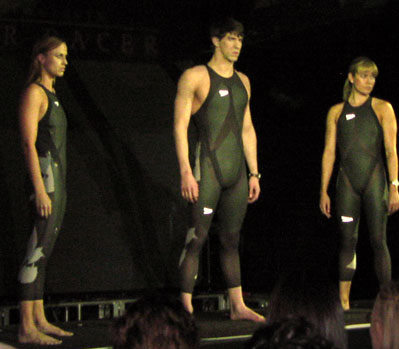

In the 2008 Olympics there was a lot of controversy over new swimsuits
that possibly provided an unfair advantage to swimmers which led to new
international rules regarding swimsuit materials and coverage. **Can a
swimsuit really make a swimmer faster?**[1]

A study[2] tested whether wearing wetsuits influences swimming velocity.
Twelve competitive swimmers swam 1500 meters at maximum speed twice
each.

-   Once wearing a wetsuit and once wearing a regular bathing suit.
-   The order of the trials was randomized.
-   Each time, the maximum velocity in meters/sec of the swimmer was
    recorded.
-   The max velocity with and without the wetsuit are recorded in the
    table below.

| Swimmer          | 1      | 2      | 3      | 4      | 5      | 6      | 7      | 8      | 9      | 10     | 11     | 12     |
|--------|-----|-----|-----|-----|-----|------|------|------|------|------|------|------|
| New Wetsuit      | $1.57$ | $1.47$ | $1.42$ | $1.35$ | $1.22$ | $1.75$ | $1.64$ | $1.57$ | $1.56$ | $1.53$ | $1.49$ | $1.51$ |
| Regular Swimsuit | $1.49$ | $1.37$ | $1.35$ | $1.27$ | $1.12$ | $1.64$ | $1.59$ | $1.52$ | $1.50$ | $1.45$ | $1.44$ | $1.41$ |
| Difference       | $0.08$ | $0.10$ | $0.07$ | $0.08$ | $0.10$ | $0.11$ | $0.05$ | $0.05$ | $0.06$ | $0.08$ | $0.05$ | $0.10$ |

### Question 4a

------------------------------------------------------------------------

The code cell below contains ordered vectors of maximum velocities (with
the wetsuit and with a regular swimsuit) for each of the 12 swimmers.
The ordering in each vector must be consistent since we have natural
pairing of values between the two samples. Compute the observed mean
matched-pair difference.

#### Solution to Question 4a

------------------------------------------------------------------------

Complete the code cell below by replacing each `??` with appropriate
code.

[1] Based on content from Statistics: *Unlocking the Power of
Statistics* by R. Lock, P. Lock, K. Lock, E. Lock, and D. Lock.

[2] de Lucas, Balidan, Neiva, Grecco, and Denadai. “The effects of
wetsuits on physiological and biomechanical indices during swimming’’,
*Journal of Science and Medicine in Sport*.

In [ ]:
# Vectors containing the times of each swimmer. Ordering is critical
wetsuit <- c(1.57, 1.47, 1.42, 1.35, 1.22, 1.75, 1.64, 1.57, 1.56, 1.53, 1.49, 1.51)
none <- c(1.49, 1.37, 1.35, 1.27, 1.12, 1.64, 1.59, 1.52, 1.50, 1.45, 1.44, 1.41)
Diff <- wetsuit - none
obs.match <- mean(Diff)
obs.match

The mean of the differences of the sample is $\bar{x}_{\rm{diff}}=0.075$
meters per second. Note the mean difference is positive, which implies
the wetsuit velocities are greater, on average, than the velocities with
a regular swimsuit. Is this difference big or due to randomness in
sampling?

### Question 4b

------------------------------------------------------------------------

Generate one possible bootstrap resample and print the values in your
resample to the screen.

#### Solution to Question 4b

------------------------------------------------------------------------

Complete the code cell below by replacing each `??` with appropriate
code.

In [ ]:
sample(Diff, 12, replace = TRUE)

### Question 4c

------------------------------------------------------------------------

Construct a 95% bootstrap percentile confidence interval to estimate
this difference.

#### Solution to Question 4c

------------------------------------------------------------------------

Complete the code cell below by replacing each `??` with appropriate
code.

# Remove set seed

In [ ]:
set.seed(917)

n <- length(Diff) # number of matched-pairs in sample

N <- 10^5
boot.match <- numeric(N)

# Create bootstrap samples by picking n difference from original sample
# With replacement, and then find mean of those differences.
for (i in 1:N)
{
  samp.diff <- sample(Diff, n, replace = TRUE)
  boot.match[i] <- mean(samp.diff)
}


# Bootstrap mean and bootstrap standard error
mean.match <- mean(boot.match)
se.match <- sd(boot.match)


# Calculate lower and upper cutoffs
# for the 95% Bootstrap CI
lower.match <- quantile(boot.match, probs = 0.025)
upper.match <- quantile(boot.match, probs = 0.975)
lower.match
upper.match

# Display bootstrap distribution
hist(boot.match, xlab = "difference in max velocity in m/sec (wetsuit - none)",
      main = "Bootstrap Dist for Mean Matched-Pair Difference (n=12)")


# Add a red line at the observed mean matched-pair difference
abline(v = obs.match, col = "red", lwd = 2, lty = 2)

# Add blue lines at cutoffs for 95 percentile
abline(v = lower.match, col = "blue", lwd = 2, lty = 2)
abline(v = upper.match, col = "blue", lwd = 2, lty = 2)

### Question 4d

------------------------------------------------------------------------

Interpret the practical meaning of your answer to [Question
4c](#question-4c). Do you think it is plausible to conclude the wetsuit
gives a competitive advantage? Explain why or why not.

#### Solution to Question 4d

------------------------------------------------------------------------

The range of plausible values for the mean matched-pair difference in
maximum velocities of all swimmers is from 0.066 meters per second to
0.089 meters per second. Since 0 is not inside this interval, it is not
a plausible value. Therefore, we see the mean matched-pair difference is
not zero. The only plausible values are positive, so the wetsuit
increases a swimmers velocity, and it does indeed give a competitive
advantage.

# Appendix: Downloading Data From Kaggle

------------------------------------------------------------------------

## What is Kaggle?

------------------------------------------------------------------------

According to [Wikipedia](https://en.wikipedia.org/wiki/Kaggle):

[**Kaggle**](https://www.kaggle.com/), a subsidiary of Google LLC, is an
online community of data scientists and machine learning practitioners.
Kaggle allows users to find and publish data sets, explore and build
models in a web-based data-science environment, work with other data
scientists and machine learning engineers, and enter competitions to
solve data science challenges.

-   [Kaggle](https://www.kaggle.com/) is a great place to find
    interesting datasets to analyze!
-   You can search their available [datasets
    here](https://www.kaggle.com/datasets).

## Downloading Screen Time Data

------------------------------------------------------------------------

-   In this worksheet, we use the dataset named [Analyzing Screen
    Time](https://www.kaggle.com/datasets/ruchi798/analyzing-screen-time)[1]

<!-- -->

-   To download the dataset, after going to the [link for the
    dataset](https://www.kaggle.com/datasets/ruchi798/analyzing-screen-time):
    -   Click on the download link in the top right corner of the page.
    -   Unzip the downloaded file.
    -   Save the file named \[**Screentime - Overall Usage.csv**\] in
        the same file directory that you have saved this R Markdown
        file.
    -   Careful, there are two other csv downloaded, we only will be
        working with Overall Usage file.
    -   If you save the file elsewhere, then you will need to set your
        working directory, using the command `setwd`, to the directory
        where you have saved the file.

## Setting the Working Directory

-   To import that data into R, first be sure the file is saved in your
    working directory.

[1] <https://creativecommons.org/publicdomain/zero/1.0/>

In [ ]:
# this gets your current working directory
getwd()

-   If your file is not located in the working directory indicated by
    the output above, you can change the working directory to the
    location where you have saved the data.

In [ ]:
# Sample of a typical file path on Mac
#setwd("/Users/adamspiegler/Documents/my/working/directory")

# Sample of a typical file path on Windows
#setwd("c:/Documents/my/working/directory")

## Importing Data with \`read_csv\`\`

------------------------------------------------------------------------

-   Finally, you can import the data into R using the command `read_csv`
    from the `tidyverse` package. We first load the `tidyverse`
    packaged, and then import the data.

In [ ]:
library(tidyverse)

In [ ]:
screentime <- read_csv("Screentime - Overall Usage.csv")
head(screentime)

-   We now have created a data frame named `screentime` that we can
    analyze in R!